In [93]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import pandas as pd

In [94]:
# Guillaume Melis 

# The Data

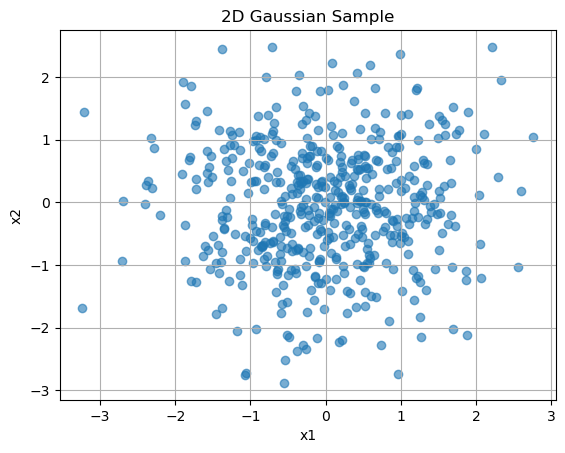

In [95]:
N = 500

xgauss1 = [rd.gauss(0, 1) for _ in range(N)]
xgauss2 = [rd.gauss(0, 1) for _ in range(N)]

plt.scatter(xgauss1, xgauss2, alpha=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Gaussian Sample')
plt.grid(True)
plt.show()

## The Labeled data set

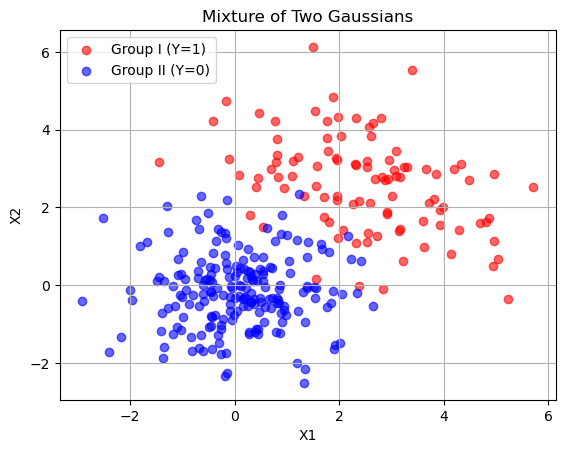

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Group I parameters
n1 = 100
mu1 = np.array([2.5, 2.5])
sigma1 = np.array([[2, -0.8], 
                   [-0.8, 2]])

# Group II parameters
n2 = 200
mu2 = np.array([0, 0])
sigma2 = np.array([[1, 0],
                   [0, 1]])

# Simulate data
group1 = np.random.multivariate_normal(mu1, sigma1, n1)
group2 = np.random.multivariate_normal(mu2, sigma2, n2)

# Labels
Y1 = np.ones(n1)
Y2 = np.zeros(n2)

# Combine data
X = np.vstack((group1, group2))
Y = np.hstack((Y1, Y2))

# Plot
plt.scatter(group1[:,0], group1[:,1], color='red', alpha=0.6, label='Group I (Y=1)')
plt.scatter(group2[:,0], group2[:,1], color='blue', alpha=0.6, label='Group II (Y=0)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Mixture of Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
def stats(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    corr = np.corrcoef(data[:,0], data[:,1])[0,1]
    return mean, std, corr

mean1, std1, corr1 = stats(group1)
mean2, std2, corr2 = stats(group2)

print("Group I (Y=1):")
print("Mean:", mean1)
print("Std:", std1)
print("Correlation:", corr1)

print("\nGroup II (Y=0):")
print("Mean:", mean2)
print("Std:", std2)
print("Correlation:", corr2)

Group I (Y=1):
Mean: [2.47264194 2.58917458]
Std: [1.40830701 1.21811722]
Correlation: -0.3942837141630374

Group II (Y=0):
Mean: [ 0.07642961 -0.14396881]
Std: [0.9996734  0.93872544]
Correlation: 0.019514961443651144


## New Data Inputs without labels

In [98]:
x1, x2 = X[:,0], X[:,1]

#Eval data
x1_min, x1_max= min(x1), max(x1)
x2_min, x2_max= min(x2), max(x2)
Neval=15; h1= (x1_max-x1_min)/Neval; h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval= np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2))
grid_points = np.c_[x1Eval.ravel(), x2Eval.ravel()]

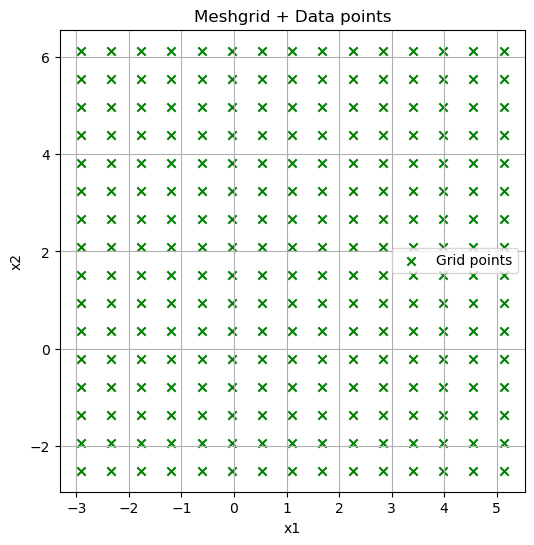

In [99]:
plt.figure(figsize=(6,6))
plt.scatter(x1Eval, x2Eval, color='green', marker='x', label='Grid points')
#plt.scatter(group1[:,0], group1[:,1], color='red', alpha=0.6, label='Group I (Y=1)')
#plt.scatter(group2[:,0], group2[:,1], color='blue', alpha=0.6, label='Group II (Y=0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Meshgrid + Data points')
plt.legend()
plt.grid(True)
plt.show()

# A First Model of Machine Learning. The Naive Bayes model

In [100]:
classes = np.unique(Y)
print(classes)

priors = {}
for c in classes:
    priors[c] = np.mean(Y == c)

print("Priors:", priors)

[0. 1.]
Priors: {0.0: 0.6666666666666666, 1.0: 0.3333333333333333}


In [101]:
means = {}
stds = {}

for c in classes:
    X_c = X[Y == c]  # observations de la classe c
    means[c] = X_c.mean(axis=0)   # moyenne par dimension
    stds[c] = X_c.std(axis=0)     # écart-type par dimension

print("Means:", means)
print("Stds:", stds)

Means: {0.0: array([ 0.07642961, -0.14396881]), 1.0: array([2.47264194, 2.58917458])}
Stds: {0.0: array([0.9996734 , 0.93872544]), 1.0: array([1.40830701, 1.21811722])}


In [102]:
def gaussian_likelihood_scalar(x, mean, std):
    likelihood = 1.0
    for i in range(len(x)):
        likelihood *= (1 / (np.sqrt(2 * np.pi) * std[i])) * np.exp(-0.5 * ((x[i]-mean[i])/std[i])**2)
    return likelihood


In [103]:
def predict_nb(X_new, classes, priors, means, stds):
    predictions = []
    for x in X_new:
        posteriors = []
        fposteriors = []
        for c in classes:
            likelihood = gaussian_likelihood_scalar(x, means[c], stds[c])
            posterior = likelihood * priors[c]
            posteriors.append(posterior)  
        predictions.append(classes[int(np.argmax(posteriors))])
    return np.array(predictions)

y_pred = predict_nb(X, classes, priors, means, stds)

In [104]:
accuracy = np.mean(y_pred == Y)
print("Training accuracy:", accuracy)

Training accuracy: 0.9666666666666667


## Evaluation of the model

### Number of errors, number of False Positive and False negative observations

In [105]:
print(y_pred.shape)
print(Y.shape)

(300,)
(300,)


In [106]:
n_errors = np.sum(y_pred != Y)
print("Total number of errors :", n_errors)

Total number of errors : 10


In [107]:
FN = np.sum((Y == 1) & (y_pred == 0))
print("False Negatives :", FN)

False Negatives : 4


In [108]:
FP = np.sum((Y == 0) & (y_pred == 1))
print("False Positives :", FP)

False Positives : 6


### Accuracy, Precision, recall and F1-Score

In [ ]:
#from sklearn.metrics import confusion_matrix

#confusion_matrix(Y,y_pred)

array([[194,   6],
       [  4,  96]])

In [110]:
TP = np.sum((Y == 0) & (y_pred == 0))
print("True Positive :",TP)

TN = np.sum((Y==1) & (y_pred == 1))
print("True Negative :",TN)

True Positive : 194
True Negative : 96


In [111]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy score :', Accuracy)

Accuracy score : 0.9666666666666667


In [112]:
Recall = TP/(FN+TP)
print('Recall :', Recall)

Recall : 0.9797979797979798


In [113]:
precision = TP/(FP+TP)
print('Precision :', precision)

Precision : 0.97


In [114]:
F1_Score = 2*(precision*Recall)/(precision+Recall)
print("F1-Score for the Naive Bayes :", F1_Score)

F1-Score for the Naive Bayes : 0.9748743718592964


## Class Prediction for new inputs using the calibrated naive Bayes model

In [115]:
print(grid_points.shape)

(240, 2)


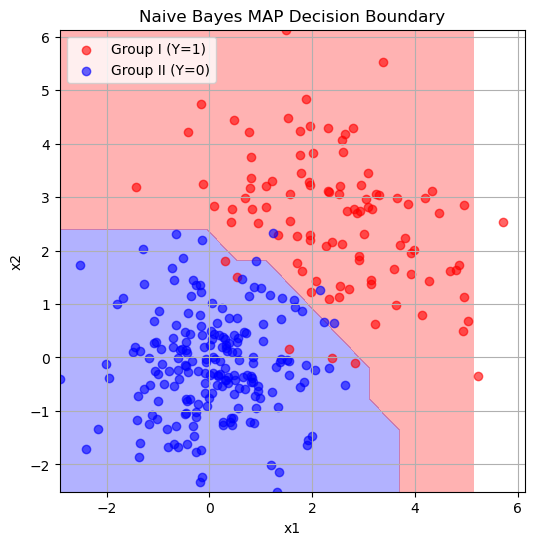

In [116]:
grid_pred = predict_nb(grid_points, classes, priors, means, stds)

grid_pred = grid_pred.reshape(x1Eval.shape)

plt.figure(figsize=(6,6))
plt.contourf(x1Eval, x2Eval, grid_pred, alpha=0.3, levels=[-0.5,0.5,1.5], colors=['blue','red'])
#plt.scatter(x1Eval, x2Eval, color='green', marker='x', label='Grid points')
plt.scatter(group1[:,0], group1[:,1], color='red', alpha=0.6, label='Group I (Y=1)')
plt.scatter(group2[:,0], group2[:,1], color='blue', alpha=0.6, label='Group II (Y=0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Naive Bayes MAP Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# The Sickit Learn Library

## Calibration and fit of the model

In [117]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnbfit=gnb.fit(X, Y)
y_pred= gnbfit.predict(X)

## Model Parameter Analysis

In [118]:
gnb.class_count_

array([200., 100.])

In [119]:
gnb.class_prior_

array([0.66666667, 0.33333333])

In [120]:
gnb.classes_

array([0., 1.])

In [121]:
gnb.theta_

array([[ 0.07642961, -0.14396881],
       [ 2.47264194,  2.58917458]])

In [122]:
gnb.var_

array([[0.99934691, 0.88120545],
       [1.98332864, 1.48380956]])

We can see that there are no differences between our classes and the class_prior and what we had in our model before.   
For the parameter theta_ which is actually the mean, we can see that (Means: {0.0: array([ 0.06747598, -0.02630997]), 1.0: array([2.57598888, 2.57615554])}) it's actually exactly the same numbers.  
And finally for the variance we can easily understand that if we take the square root of gnb.var_ we obtain the same numbers.   


In [123]:
np.sqrt(gnb.var_)

array([[0.9996734 , 0.93872544],
       [1.40830701, 1.21811722]])

Emprirical Results -> Stds: {0.0: array([0.9996734 , 0.93872544]), 1.0: array([1.40830701, 1.21811722])}

## First Evaluation of the model on training Data

### Accuracy, precision, recall and F1-Score

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(Y,y_pred))
print(precision_score(Y,y_pred))
print(recall_score(Y,y_pred))
print(f1_score(Y,y_pred))

0.9666666666666667
0.9411764705882353
0.96
0.9504950495049505


Conclusion :  
We can see that we have the same accuracy as the first model but there are differences in the precision score, the recall and the f1-score. It could have mean that values for the confusion matrix (TP, TN, FP, FN) are different but actually it's not. So it could come from the way the library is doing the computation.  
What we observe is actually normal because as there exist analytics solution for the MLE for the Bayes model, the sickit learn library should tend to what we empirically estimated.

In [125]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y,y_pred)

array([[194,   6],
       [  4,  96]])

### AUC Indicator

In [128]:
from sklearn.metrics import auc, roc_curve

y_score = gnb.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_score)
auc(fpr,tpr)

0.99585

### The ROC Curve

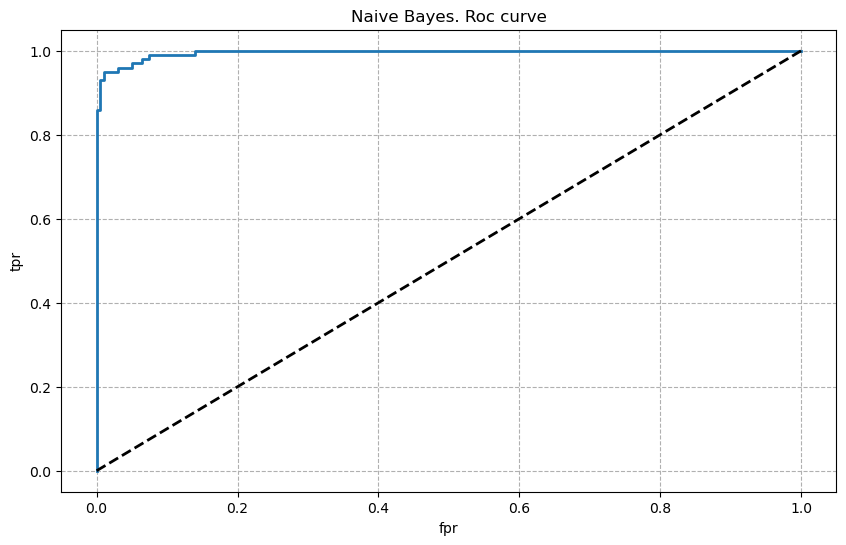

In [130]:
y_proba= gnbfit.predict_proba(X)[:,1];
fpr, tpr, thresholds= roc_curve(Y, y_proba);
figure= plt.figure(figsize=(10,6));
plt.plot(fpr,tpr, linewidth= 2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Evaluation of the predictive power

### Cross Validation

In [ ]:
#initial data set: X (inputs), y (output).
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=1/3, random_state=0)
gnb= GaussianNB()
gnbfit=gnb.fit(X_train, y_train);
y_pred= gnbfit.predict(X_test)
E_test=(y_test != y_pred).sum()/len(y_test)
print("Error on the test data set",E_test)

Error on the test data set 0.04


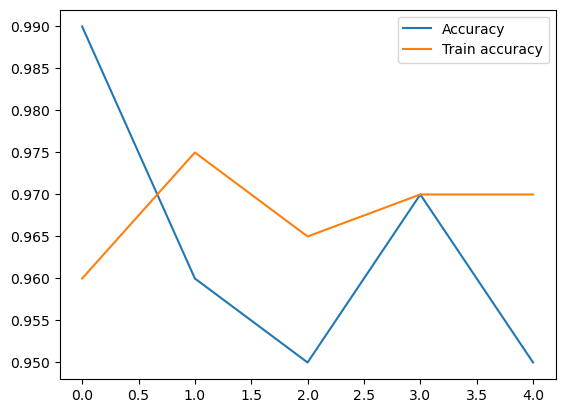

In [163]:
accuracy = []
accuracy_train = []
error = []
for i in range(5):
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=1/3, stratify=Y, random_state=i)
    gnb= GaussianNB()
    gnbfit=gnb.fit(X_train, y_train)
    y_pred= gnbfit.predict(X_test)
    E_test=(y_test != y_pred).sum()/len(y_test)
    error += [E_test]
    accuracy += [accuracy_score(y_test,y_pred)]
    accuracy_train += [accuracy_score(y_train,gnbfit.predict(X_train))]


plt.plot(accuracy, label="Accuracy")
plt.plot(accuracy_train, label='Train accuracy')
plt.legend()
plt.show()


We clearly see that the accuracy is decreasing function of K. 

### K-Fold Methdology

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(gnb, X, Y, cv=kf, scoring=scoring, return_train_score=True)

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-pa

In [144]:
cv_results

{'fit_time': array([0.00096011, 0.00036192, 0.00030899, 0.00026917, 0.00029802]),
 'score_time': array([0.00537276, 0.00445604, 0.00271106, 0.00250173, 0.00254011]),
 'test_accuracy': array([0.93333333, 0.96666667, 0.96666667, 0.96666667, 0.93333333]),
 'train_accuracy': array([0.98333333, 0.975     , 0.95416667, 0.95833333, 0.96666667]),
 'test_auc': array([   nan, 0.9975,    nan,    nan,    nan]),
 'train_auc': array([0.996375  , 0.9962037 , 0.99592857, 0.9955    , 0.99635714]),
 'test_f1': array([0.96551724, 0.97435897, 0.        , 0.        , 0.        ]),
 'train_f1': array([0.95      , 0.95      , 0.94581281, 0.95049505, 0.96039604]),
 'test_precision': array([1., 1., 0., 0., 0.]),
 'train_precision': array([0.95      , 0.95      , 0.93203883, 0.94117647, 0.95098039]),
 'test_recall': array([0.93333333, 0.95      , 0.        , 0.        , 0.        ]),
 'train_recall': array([0.95, 0.95, 0.96, 0.96, 0.97])}

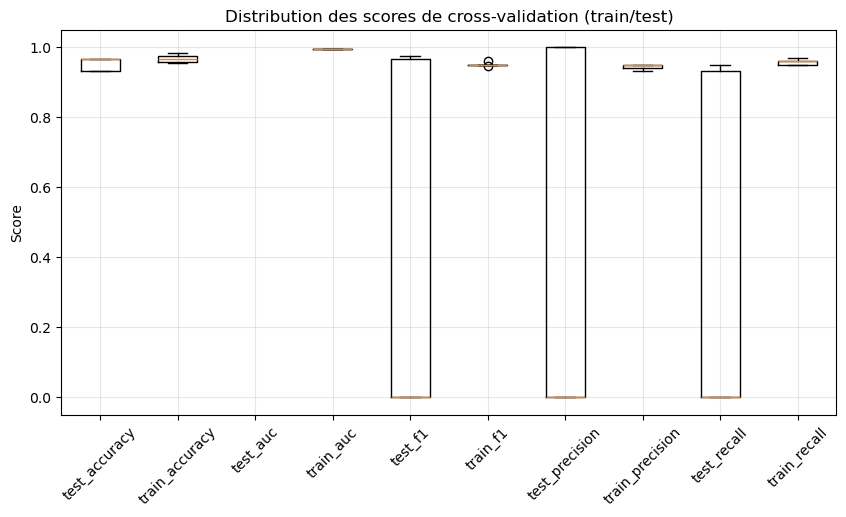

In [167]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()